In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [175]:
df = pd.read_csv("/Users/debashishboruah/Documents/me/jupyternotebook_projects/case_study/dataset")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [176]:
df.shape

(918, 12)

In [177]:
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [178]:
df.tail(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [179]:
arr1=df["ChestPainType"].unique() 
arr2=df["FastingBS"].unique() 
arr3=df["RestingECG"].unique()
arr4=df["ExerciseAngina"].unique() 
arr5=df["ST_Slope"].unique() 
arr6=df["HeartDisease"].unique() 
print(f"Chest Pain Types:",arr1)
print(f"FastingBS:",arr2)
print(f"RestingECG:",arr3)
print(f"ExerciseAngina:",arr4)
print(f"ST_slope:",arr5)
print(f"HeartDisease:",arr6)

Chest Pain Types: ['ATA' 'NAP' 'ASY' 'TA']
FastingBS: [0 1]
RestingECG: ['Normal' 'ST' 'LVH']
ExerciseAngina: ['N' 'Y']
ST_slope: ['Up' 'Flat' 'Down']
HeartDisease: [0 1]


In [180]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [181]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [182]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['ChestPainType'] = le.fit_transform(df['ChestPainType'])
df['RestingECG'] = le.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = le.fit_transform(df['ST_Slope'])

In [183]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [184]:
df['Oldpeak'] = le.fit_transform(df['Oldpeak'])

In [185]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,10,2,0
1,49,0,2,160,180,0,1,156,0,20,1,1
2,37,1,1,130,283,0,2,98,0,10,2,0
3,48,0,0,138,214,0,1,108,1,25,1,1
4,54,1,2,150,195,0,1,122,0,10,2,0
5,39,1,2,120,339,0,1,170,0,10,2,0
6,45,0,1,130,237,0,1,170,0,10,2,0
7,54,1,1,110,208,0,1,142,0,10,2,0
8,37,1,0,140,207,0,1,130,1,25,1,1
9,48,0,1,120,284,0,1,120,0,10,2,0


In [186]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

<Axes: xlabel='HeartDisease', ylabel='count'>

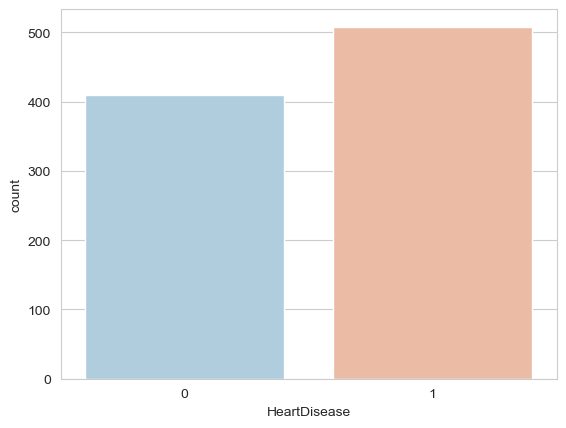

In [187]:
sns.set_style("whitegrid")
sns.countplot(x='HeartDisease',data=df,palette='RdBu_r')

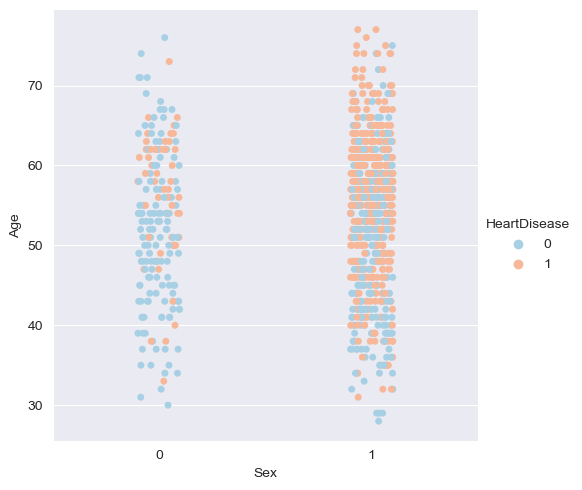

In [188]:
sns.set_style("darkgrid")
sns.catplot(x='Sex',y='Age',hue='HeartDisease',data=df,palette='RdBu_r')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,0.055750,-0.077150,0.254399,-0.095282,0.198039,-0.007484,-0.382045,0.215793,0.266295,-0.268264,0.282039
Sex,0.055750,1.000000,-0.126559,0.005133,-0.200092,0.120076,0.071552,-0.189186,0.190664,0.116254,-0.150693,0.305445
ChestPainType,-0.077150,-0.126559,1.000000,-0.020647,0.067880,-0.073151,-0.072537,0.289123,-0.354727,-0.180408,0.213521,-0.386828
RestingBP,0.254399,0.005133,-0.020647,1.000000,0.100893,0.070193,0.022656,-0.112135,0.155101,0.157215,-0.075162,0.107589
Cholesterol,-0.095282,-0.200092,0.067880,0.100893,1.000000,-0.260974,-0.196544,0.235792,-0.034166,0.036837,0.111471,-0.232741
FastingBS,0.198039,0.120076,-0.073151,0.070193,-0.260974,1.000000,0.087050,-0.131438,0.060451,0.069180,-0.175774,0.267291
RestingECG,-0.007484,0.071552,-0.072537,0.022656,-0.196544,0.087050,1.000000,-0.179276,0.077500,-0.015096,-0.006778,0.057384
MaxHR,-0.382045,-0.189186,0.289123,-0.112135,0.235792,-0.131438,-0.179276,1.000000,-0.370425,-0.173017,0.343419,-0.400421
ExerciseAngina,0.215793,0.190664,-0.354727,0.155101,-0.034166,0.060451,0.077500,-0.370425,1.000000,0.422670,-0.428706,0.494282
Oldpeak,0.266295,0.116254,-0.180408,0.157215,0.036837,0.069180,-0.015096,-0.173017,0.422670,1.000000,-0.513817,0.420282


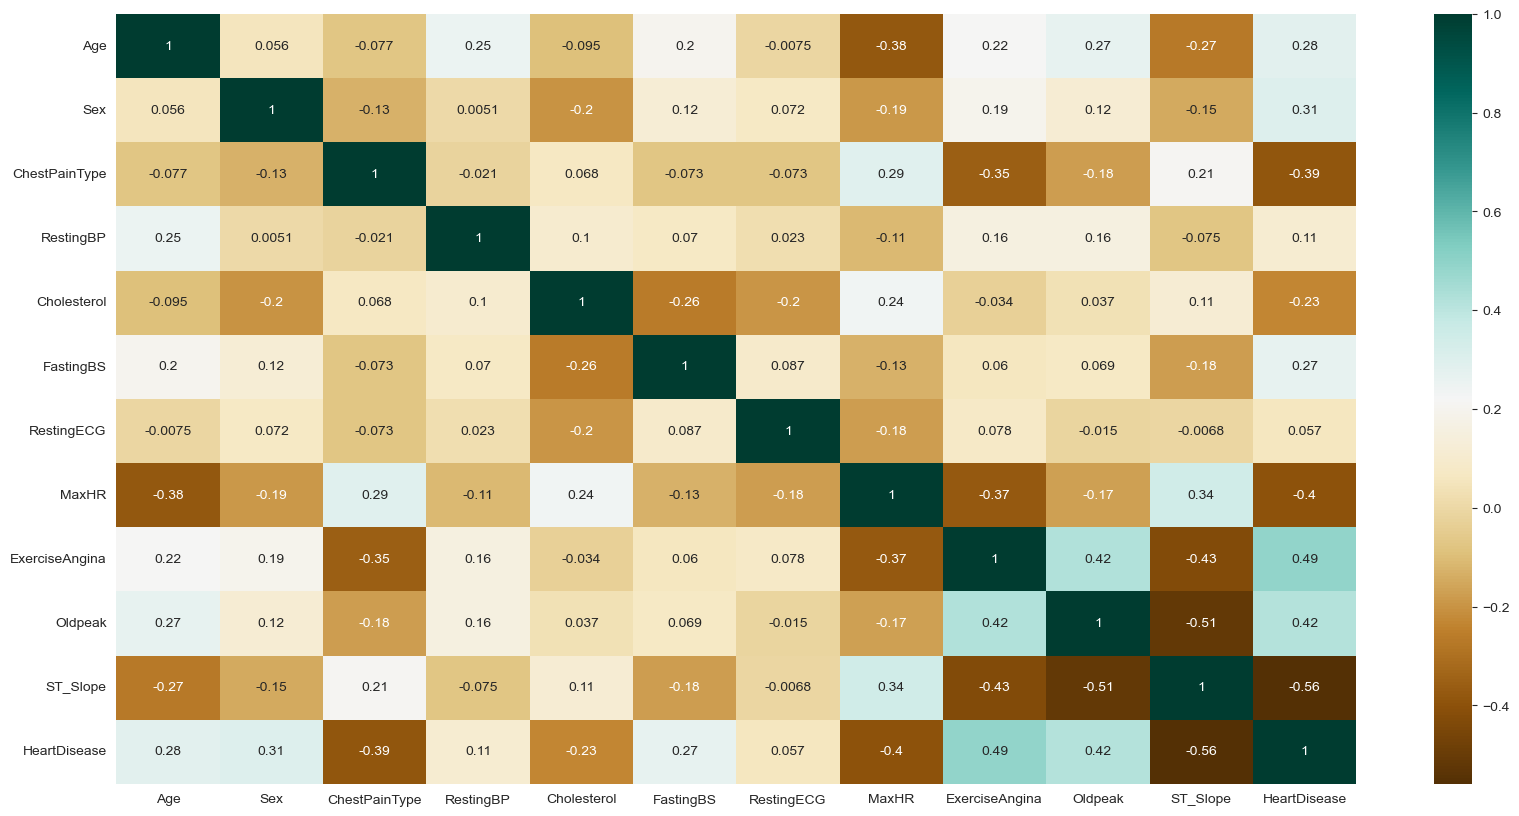

In [189]:
plt.figure(figsize=(20,10))
c= df.corr() 
sns.heatmap(c,cmap="BrBG",annot=True) 
c

In [190]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [191]:
mms = MinMaxScaler()
scaler = StandardScaler()

In [192]:
df['Age'] = scaler.fit_transform(df[['Age']])
df['RestingBP'] = scaler.fit_transform(df[['RestingBP']])
df['Cholesterol'] = scaler.fit_transform(df[['Cholesterol']])
df['MaxHR'] = scaler.fit_transform(df[['MaxHR']])
df['Oldpeak'] = mms.fit_transform(df[['Oldpeak']])

In [193]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,1,1,0.410909,0.825070,0,1,1.382928,0,0.192308,2,0
1,-0.478484,0,2,1.491752,-0.171961,0,1,0.754157,0,0.384615,1,1
2,-1.751359,1,1,-0.129513,0.770188,0,2,-1.525138,0,0.192308,2,0
3,-0.584556,0,0,0.302825,0.139040,0,1,-1.132156,1,0.480769,1,1
4,0.051881,1,2,0.951331,-0.034755,0,1,-0.581981,0,0.192308,2,0


In [194]:
X = df.drop('HeartDisease',axis=1)
y = df['HeartDisease']

In [195]:
X_test,X_train,y_test,y_train = train_test_split(X,y,random_state = 42,test_size = 0.2)

# Model 1 : Logistic regression

In [196]:
from sklearn.linear_model import LogisticRegression

In [197]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [198]:
from sklearn.metrics import accuracy_score

In [199]:
y_pred1 = model.predict(X_test)
print(f"The accuraccy score of logistic regression is:{accuracy_score(y_test,y_pred1)}")

The accuraccy score of logistic regression is:0.8256130790190735


# Model 2 : K-Nearest Neighbour(KNN)

In [200]:
from sklearn.neighbors import KNeighborsClassifier

In [201]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)

KNeighborsClassifier()

In [202]:
y_pred2 = model. predict (X_test)
print(f"The accuraccy score of KNN is:{accuracy_score(y_test,y_pred2)}")

The accuraccy score of KNN is:0.8283378746594006


# Model 3 : Decision Tree Classifier

In [203]:
from sklearn.tree import DecisionTreeClassifier

In [204]:
clf = DecisionTreeClassifier(
criterion="gini",
max_depth=4,
min_samples_split=2,
min_samples_leaf=1,
max_features=None,
random_state=42,
)

In [205]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [206]:
y_pred3 = clf.predict(X_test)
print(f"The accuraccy score of Decision tree classifier is:{accuracy_score(y_test,y_pred3)}")

The accuraccy score of Decision tree classifier is:0.7683923705722071


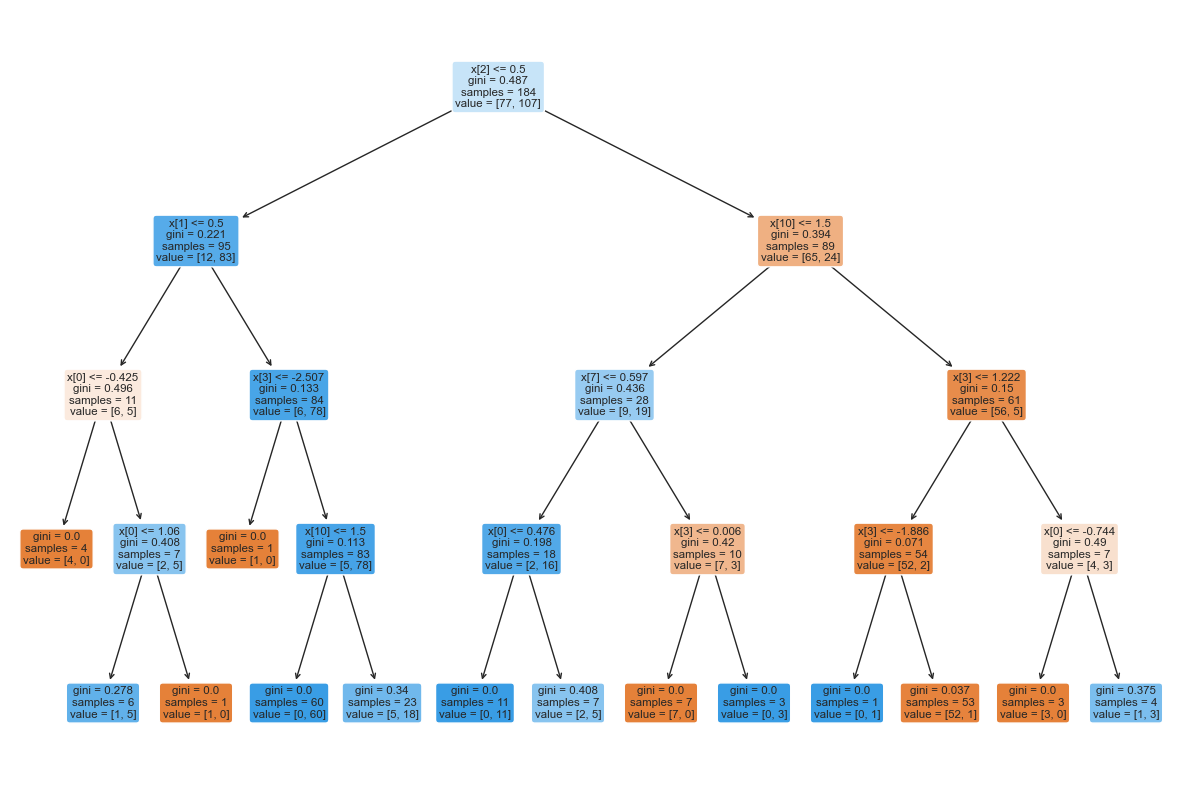

In [207]:
from sklearn import tree
plt.figure(figsize=(15, 10))
tree.plot_tree(clf, filled=True,rounded=True)
plt.show()

# Model 4 : Random Forest Classifier

In [217]:
from sklearn.ensemble import RandomForestClassifier

In [209]:
rf = RandomForestClassifier(
n_estimators=90,
criterion="gini",
max_depth=None,
min_samples_split=2,
min_samples_leaf=2,
max_features="sqrt",
)

In [210]:
rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=2, n_estimators=90)

In [211]:
y_pred4 = rf.predict(X_test)
print(f"The accuraccy score of Random Forest classifier is:{accuracy_score(y_test,y_pred4)}")

The accuraccy score of Random Forest classifier is:0.8392370572207084


# Model 5 : Support Vector Machine(SVM)

In [212]:
from sklearn import svm

In [213]:
clf = svm.SVC(kernel='linear') 

In [214]:
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [215]:
y_pred5 = clf.predict(X_test)
print(f"The accuraccy score of SVM is:{accuracy_score(y_test,y_pred5)}")

The accuraccy score of SVM is:0.8433242506811989


# Accuracy score of each model

In [216]:
print('Logistic Regression :', accuracy_score(y_test,y_pred1))
print('K-nearest neighbour :', accuracy_score(y_test,y_pred2))
print('Decision Tree :', accuracy_score(y_test,y_pred3))
print('Rnadom Forest :', accuracy_score(y_test, y_pred4))
print('Support Vector Machine', accuracy_score(y_test, y_pred5))

Logistic Regression : 0.8256130790190735
K-nearest neighbour : 0.8283378746594006
Decision Tree : 0.7683923705722071
Rnadom Forest : 0.8392370572207084
Support Vector Machine 0.8433242506811989
